In [15]:
from image_utils import *
from json_utils import *

In [16]:
import matplotlib.pyplot as plt

def show_mask(mask):
    plt.imshow(mask, cmap='binary')
    plt.show()

def show_all_masks(mask_list):

    num_masks = len(mask_list)
    num_cols = min(4, num_masks)
    num_rows = num_masks // num_cols
    num_rows += num_masks % num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    if num_rows == 1:
        axes = np.expand_dims(axes, 0)

    if num_cols == 1:
        axes = np.expand_dims(axes, -1)

    for idx, mask in enumerate(mask_list):
        row = idx // num_cols
        col = idx % num_cols
        axes[row, col].imshow(mask, cmap='gray')
        axes[row, col].axis('off')

    for idx in range(num_masks, num_rows*num_cols):
        row = idx // num_cols
        col = idx % num_cols
        fig.delaxes(axes[row][col])

    plt.tight_layout()
    plt.show()


def display_masks_on_image(image, masks):
    # Create a color map for the masks
    colors = plt.cm.hsv(np.linspace(0, 1, len(masks)+1))

    # Display the image
    plt.imshow(image, cmap='gray')

    # Overlay each mask
    for i, mask in enumerate(masks):
        plt.imshow(np.ma.masked_where(mask == 0, mask), cmap='hsv', alpha=0.5)

    plt.axis('off')
    plt.show()

In [17]:
from PIL import Image

# Specify the file path
file_path = "../test_data/test_heart"

# Load the image
original_image = Image.open(file_path + '.jpg')

In [18]:
with open(file_path + '.json', 'r') as json_file:
    json_data = json.load(json_file)

arrays = json2list(json_data)
print(f"Number of masks generated by SAM: {len(arrays)}.")

Number of masks generated by SAM: 109.


In [19]:
 # Initialize a list to store the candidates
candidates = [[], []]

 # For each array
for i, array in enumerate(arrays):
    print(f"Processing mask {i+1} of {len(arrays)}...")

    # Perform watershed segmentation
    labels = watershed(array)

    # Remove small objects
    labels = remove_small_objects(labels, min_size_ratio=0.01)

    # Detect circles and semi-circles
    circle_regions, semi_circle_regions = detect_circles_and_semi_circles(
    labels, min_circular_ratio = 0.92, max_circular_ratio =1.03, min_semi_ratio = 0.4, max_semi_ratio = 0.6)

    # Add the circle regions to the list of candidates
    candidates[0].extend(circle_regions)

    # Add the semi-circle regions to the list of candidates
    candidates[1].extend(semi_circle_regions)

print("Done!")

Processing mask 1 of 109...
Processing mask 2 of 109...
Processing mask 3 of 109...
Processing mask 4 of 109...
Processing mask 5 of 109...
Processing mask 6 of 109...
Processing mask 7 of 109...
Processing mask 8 of 109...
Processing mask 9 of 109...
Processing mask 10 of 109...
Processing mask 11 of 109...
Processing mask 12 of 109...
Processing mask 13 of 109...
Processing mask 14 of 109...
Processing mask 15 of 109...
Processing mask 16 of 109...
Processing mask 17 of 109...
Processing mask 18 of 109...
Processing mask 19 of 109...
Processing mask 20 of 109...
Processing mask 21 of 109...
Processing mask 22 of 109...
Processing mask 23 of 109...
Processing mask 24 of 109...
Processing mask 25 of 109...
Processing mask 26 of 109...
Processing mask 27 of 109...
Processing mask 28 of 109...
Processing mask 29 of 109...
Processing mask 30 of 109...
Processing mask 31 of 109...
Processing mask 32 of 109...
Processing mask 33 of 109...
Processing mask 34 of 109...
Processing mask 35 of 1

Number of circles detected: 7.


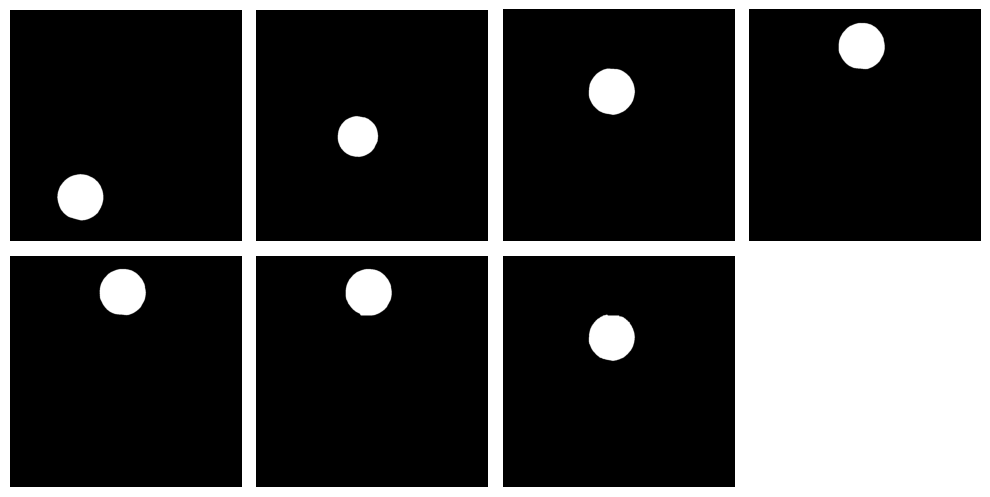

In [20]:
print(f"Number of circles detected: {len(candidates[0])}.")
show_all_masks(candidates[0])

Number of semi-circle regions detected: 20.


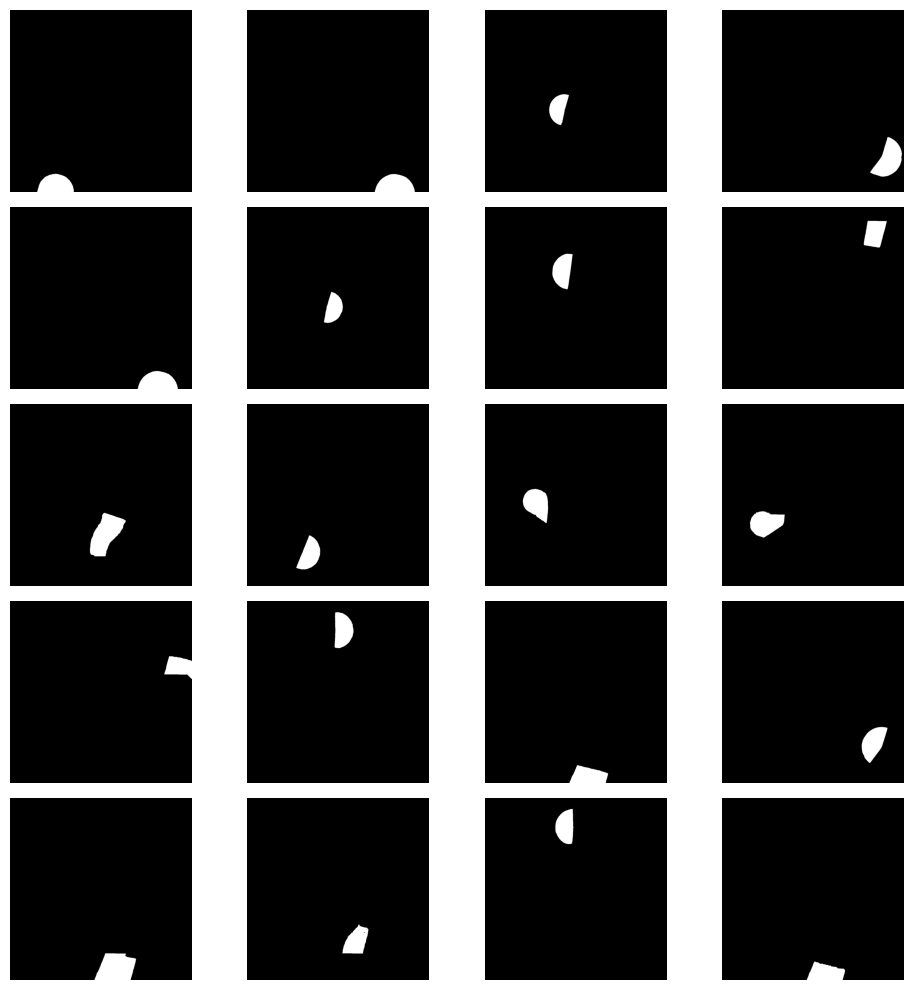

In [21]:
print(f"Number of semi-circle regions detected: {len(candidates[1])}.")
show_all_masks(candidates[1])

In [22]:
 # Merge and segment the semi-circle candidates
new_circles = merge_and_segment(candidates[1], min_circular_ratio=0.7, max_circular_ratio=1.1)

Number of new merged semi-circles: 5.


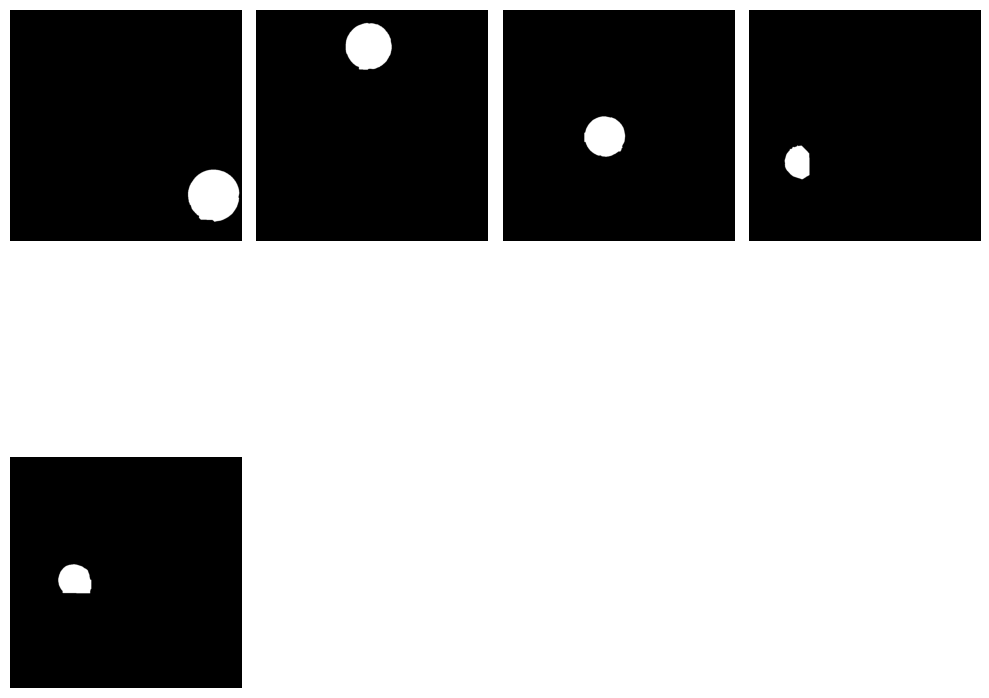

In [23]:
print(f"Number of new merged semi-circles: {len(new_circles)}.")
show_all_masks(new_circles)

In [24]:
candidates[0].extend(new_circles) #add the new merged semi-circles to the circles list
len(candidates[0])

12

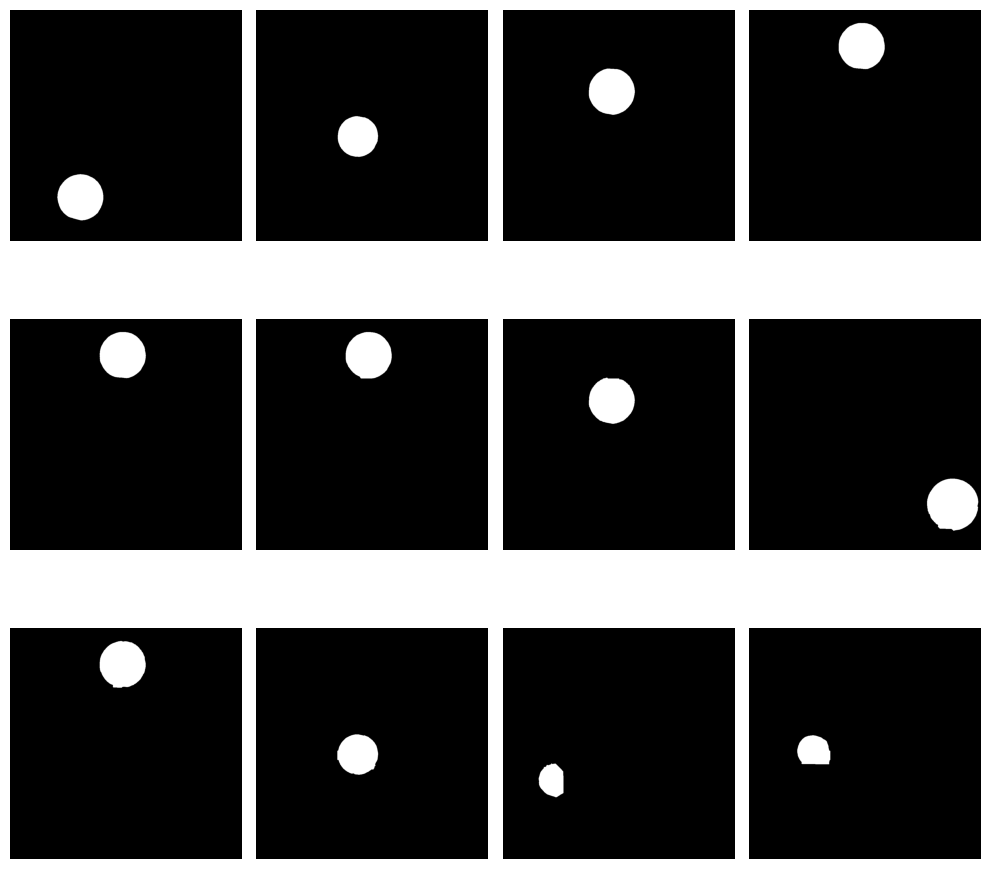

In [25]:
show_all_masks(candidates[0])

In [26]:
unique_masks = remove_duplicates(candidates[0],0.5)

Number of unique circles: 7.


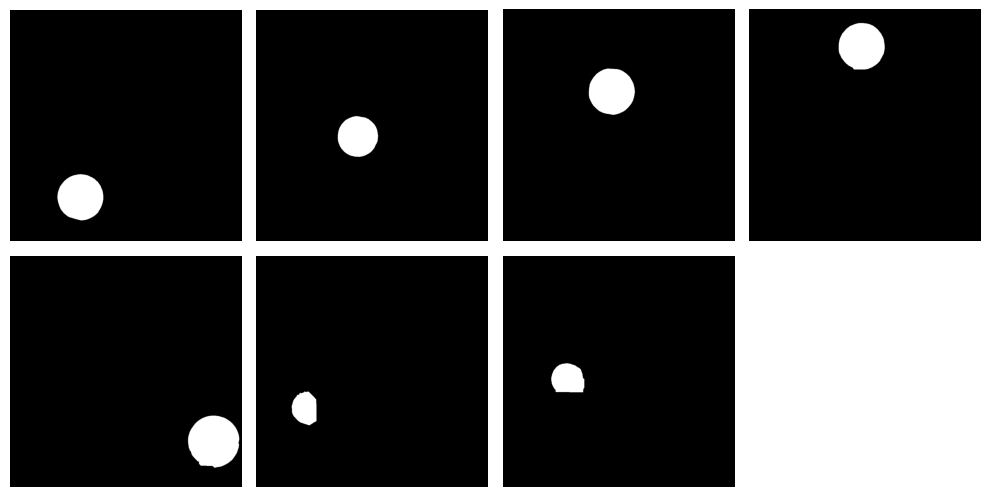

In [27]:
print(f"Number of unique circles: {len(unique_masks)}.")
show_all_masks(unique_masks)

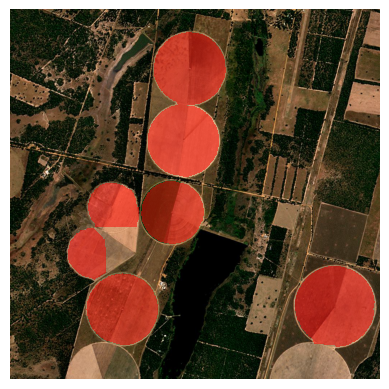

In [28]:
display_masks_on_image(original_image,unique_masks)